# TE62MI - Algebre linéaire et réduction de dimension

## TP 2. Analyse en Composantes Principales (ACP)

### Description

L'objectif de ce TP est d'étudier et mettre en œuvre l'analyse en composantes principales (ACP) comme méthode de réduction de dimensionnalité, sur des données réelles. Nous appliquerons l'ACP sur un jeu de données de vins Italiens, qui correspond à l'analyse chimique de vins cultivés dans la même région en Italie mais issus de trois cépages différents (trois types de vin, varités; trois classes). Ce jeu de données est composé de $n=178$ observations, décrivant les quantités de $d=13$ constituants trouvé dans chacun d'eux. Ainsi, la taille de l'ensemble de données est de 178 x 13. Initialement, nous chargeons les données et divisons l'ensemble de données en un sous ensemble d'entraînement et de test (après avoir mélangé les données pour avoir des instances de toutes les classes dans chaque sous ensemble).

### ACP (analyse en composantes principales)

Pour un ensemble de données de dimensions $d$, l'ACP vise à trouver un sous-espace linéaire de dimension $k$ inférieur à $d$ tel que les points de données se trouvent principalement sur ce sous-espace linéaire. Un tel sous-espace tente de maintenir la majeure partie de la variance des données. Le sous-espace linéaire peut être spécifié par $d$ vecteurs orthogonaux qui forment un nouveau système de coordonnées, appelé les composantes principales (il ne peut y en avoir plus de $n$). L'espoir est que seuls $dk< d$ composants principaux suffisent pour approximer l'espace couvert par les $d$
axes originaux. Ainsi, pour un ensemble donné de vecteurs de données $x_i; i \in 1... n$, les axes principaux $k$ sont les axes orthonormés sur lequel la variance retenue par projection est maximale. Cette transformation est définie dans une telle manière à ce que la première composante principale ait la plus grande variance possible (c'est-à-dire qu'elle représente autant de variabilité des données que possible), et chaque composante successive a à son tour la variance la plus élevée possible sous la contrainte qu'être orthogonal (c'est-à-dire non corrélé) avec les composants précédents.
Rappelons que la variance d'une variable aléatoire est donnée par la formule suivante : $\Sigma^2 (X) = \sigma^2 =
\mathbb{E}[(X -\mu)^2]$. L'ACP peut être calculée en utilisant la décomposition des valeurs propres de la matrice de covariance comme
suit :
1. Supposons que les données sont organisées dans une matrice $mxn$ $X$, soustrayez initialement les valeurs moyennes de
colonnes : $X = X - M$
2. Calculer la matrice de covariance $C= X^T X$
3. Trouver les valeurs propres et les vecteurs propres de la matrice de covariance $C$
4. Composantes principales : les $k$ vecteurs propres $V_{[1:k]}$ qui correspondent aux $k$ plus grandes valeurs propres
5. Projetez les données dans le nouvel espace : $XV_{[1:k]}$

Comme nous l'avons déjà discuté, l'ACP transforme les données dans un espace de dimension inférieure en préservant
la variance. La fraction de variance qui est préservée dans les données transformées peut être capturée par le
formule suivante :

\begin{equation}
    var = \frac{\sum_{i=0}^k \lambda_i}{\sum_{j=0}^d \lambda_j}
\end{equation}

où $d$ est le nombre de dimensions dans l'ensemble de données d'origine, $k$ est le nombre de dimensions dans le nouveau
l'espace de représentation, et $\lambda$ sont les valeurs propres de la matrice de covariance triées par ordre décroissant.

### Tâches à effectuer dans ce TP

Compléter les champs de code manquant, entre `### TODO ###` et `### ENDO ###` afin de
mettre en œuvre la technique de l'ACP
- Compléter les méthodes `fit` et `transform` dans la classe appelée `PCA` (`section 2`) 
- Tester votre implémentation et comparer à sciki-learn. Inspecter la distribution des valeurs singulières de $X$ (`section 3`) 
- Quelle est la variance expliquée par chaque composante principale? (`section 3`)
- Projeter les données en 3D (sur les 3 premières composantes) et les visualiser en 2D. (`section 4`)
- Qu'observez-vous ? Pouvez-vous trouver le cépage avec la plus grande « variation » ? (`section 4`)
- Interpréter le sens des vecteurs propres appris. Quelles caractéristiques d'origine affectent l'espace de dimension réduite? (`section 5`) 
- Tester avec un autre dataset de votre choix (`section 1`)

## 1. Load the Wine dataset

In [1]:
# Load data (Wine dataset)
import numpy as np
dataset = np.genfromtxt('data/wine_data.csv', delimiter=',')

In [2]:
# Shuffle and split datataset
np.random.seed(42) # seed to reproduce results
np.random.shuffle(dataset)
X_train = dataset[:100,1:] # training data
X_test = dataset[101:,1:] # testing data

In [3]:
# Print X_train shape (n,d)
X_train.shape

(100, 13)

## 2. Implement PCA

In [4]:
class PCA(object):
    
    def __init__(self, n_components=2):
        
        # input space
        self.n_features_in_  = None # a number, int (d)
        self.n_samples_ = None # a number, int (n)
        
        # center data
        self.mean_ = None # a vector, ndarray of shape (d,)
        
        # principal components
        self.n_components_ = n_components # a number, int (k)
        self.components_ = None # a matrix, ndarray of shape (k, d), aka eigenvectors
        self.singular_values_ = None # a vector, ndarray of shape (k,), aka eigenvalues**1/2
        self.explained_variance_ratio_ = None #  a vector, ndarray of shape (k,)
    
    def fit(self, X):
        ''' 
        Performs principal components analysis (PCA) on the n-by-d data matrix X (data)
        Rows of X correspond to observations (wines), columns to variables.
        
        Saves values for self.n_features_in_, self.n_samples_, self.mean_
        as well as self.singular_values_, self.components_ and self.explained_variance_ratio_
        For example, self.n_features_in_ = X.shape[1]
        
        Args:
            X: the data matrix (n,p)
        '''
        
        k = self.n_components_
        self.n_samples_ = X.shape[0]
        self.n_features_in_ = X.shape[1]
        
        # Compute the mean and center X (save self.mean_)

        ### TODO ###
        self.mean_ = np.mean(X,0) # compute the mean
        X = X - self.mean_ # subtract the mean (along columns)
        #self.std_ = np.std(X,0) # compute the std
        #X = X/self.std_
        ### ENDO ###
        
        # Calculate the covariance matrix C
        
        ### TODO ###
        C = np.dot(np.transpose(X),X) # computute covariance matrix
        eigval, eigvec = np.linalg.eig(C) # compute eigenvalues and eigenvectors of covariance matrix
        ### ENDO ###

        # Save the matrix decomposition parameters (save self.singular_values_, self.components_)
        
        ### TODO ###
        self.singular_values_ = np.sqrt(eigval[:k]) # eigenvalues
        self.components_ = eigvec[:k] # eigenvectors according to eigenvalues
        self.explained_variance_ratio_ = self.singular_values_**2 / np.sum(eigval)
        ## ENDO ##
        
        # Measure the quality of the low rank approximation (save self.explained_variance_ratio_)
        
        ### TODO ###
        self.explained_variance_ratio_ = self.singular_values_**2 / np.sum(eigval)
        ## ENDO ##
        
    def transform(self, X):
        ''' 
        Reduces dimensonality of the n-by-d data matrix X using principal components analysis (PCA)
        
        Args:
            X: the data matrix (n,d)
        Returns:
            y: the data in a lower dimension (n, k)
        '''
        
        # Project X on the new space
        
        ## TODO ##
        X = X - self.mean_ # subtract the mean (along columns)
        #X = X / self.std_
        y = np.dot(X, np.real(self.components_).T)
        return y
        ## ENDO ##
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

## 3. Test your implementation

In [5]:
#!pip install scikit-learn # uncomment this line to install scikit learn

In [6]:
#from sklearn.decomposition import PCA # uncomment this line to compare your implementation to scikit learn
pca = PCA(n_components=3)
pca.fit(X_train)

assert pca.n_samples_ == X_train.shape[0]
assert pca.n_features_in_ == X_train.shape[1]
assert pca.n_components_ == 3
assert pca.mean_.shape == (X_train.shape[1],)
assert pca.components_.shape == (3, X_train.shape[1])
assert pca.singular_values_.shape == (3,)
assert np.sum(np.abs(pca.singular_values_)-pca.singular_values_)==0 # positive values
assert pca.explained_variance_ratio_[0] >= 0.

print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[3125.01888523  139.42402451   28.82757358]
[9.97854661e-01 1.98626517e-03 8.49137804e-05]


In [7]:
y_train = pca.transform(X_train)
y_test = pca.transform(X_test)

assert y_train.shape == (X_train.shape[0], 3)
assert y_test.shape == (X_test.shape[0], 3)

## 4. Visualize results

In [8]:
import matplotlib.pyplot as plt

def visualize_data(offset=0):
    plt.figure(1, figsize=(10,5))

    plt.subplot(121)
    c_train = dataset[:100,0] # class labels of training data (cultivars, type of wine) 
    plt.scatter(y_train[:,offset], y_train[:,offset+1], c=c_train)
    plt.xlabel("Principal component {}".format(offset+1))
    plt.ylabel("Principal component {}".format(offset+2))
    plt.title("PCA on the WINE dataset (train)")

    plt.subplot(122)
    c_test = dataset[101:,0] # class labels of testing data (cultivars, type of wine) 
    plt.scatter(y_test[:,offset], y_test[:,offset+1], c=c_test)
    plt.xlabel("Principal component {}".format(offset+1))
    plt.ylabel("Principal component {}".format(offset+2))
    plt.title("PCA on the WINE dataset (test)")

    plt.show()

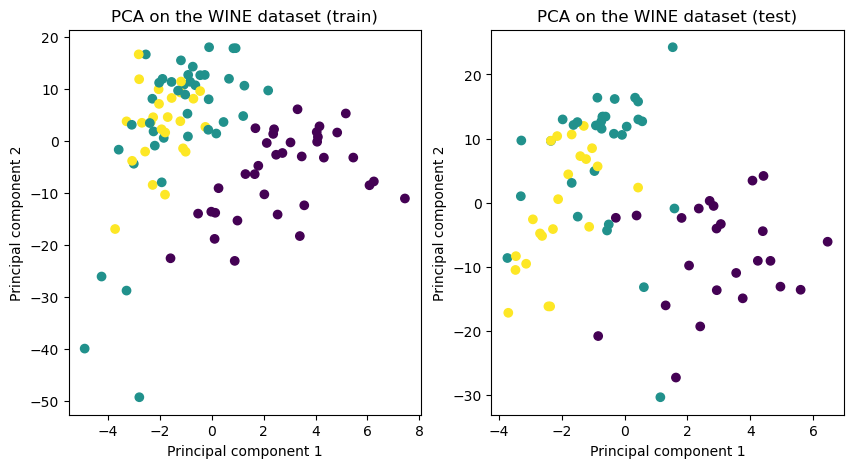

In [9]:
visualize_data(offset=0) # change to 1 to visualize projection on principal components 2 and 3

### TODO ###
# What do you observe?
# Which principal components help distinguish types of wine? [PC1, PC3]
### ENDO ###

## 5. Analyse model

In [10]:
### TODO ###
# What dimensions of the original space do the principal components encode?
### ENDO ###

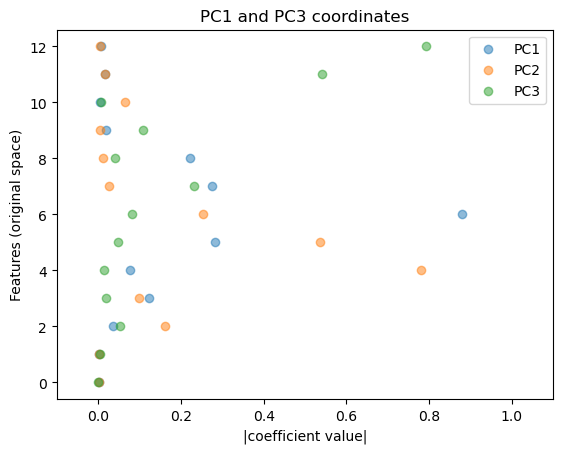

In [11]:
plt.scatter(np.abs(pca.components_[0]), np.arange(len(pca.components_[0])), label="PC1", alpha=0.5)
plt.scatter(np.abs(pca.components_[1]), np.arange(len(pca.components_[1])), label="PC2", alpha=0.5)
plt.scatter(np.abs(pca.components_[2]), np.arange(len(pca.components_[2])), label="PC3", alpha=0.5)
plt.xlabel("|coefficient value|")
plt.xlim(-0.1,1.1)
plt.ylabel("Features (original space)")
plt.title("PC1 and PC3 coordinates")
plt.legend()
plt.show()